In [1]:
import mlflow
from dataset import DataPreparation
from models import *
from eval import *
import torch 
from sklearn.metrics import f1_score
mlflow.set_tracking_uri("http://127.0.0.1:5000")

In [2]:
import mlflow.pytorch

# Load model from a specific run_id
run_id = "8cf6fc3b2ce242eaaec7a02588eff3f1"
loaded_model = mlflow.pytorch.load_model(f"runs:/{run_id}/pytorch-model")

/home/tari/.virtualenvs/ner/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm

In [3]:
class Config:
    def __init__(self):
        self.device = 'cuda' if torch.cuda.is_available() else 'cpu'  # Thiết bị sử dụng (cuda hoặc cpu)
        self.train_dir = "/home/tari/Documents/BackUp_AI_Class/day04/exercise/dataset/train/"  # Đường dẫn đến dữ liệu huấn luyện
        self.test_dir = '/home/tari/Documents/BackUp_AI_Class/day04/exercise/dataset/test/'
        self.num_classes = None
        self.class_names = None
        self.batch_size = 16
        self.max_epochs = 10
        self.patience = 3
        self.lr = 0.0001
        self.beta1 = 0.95
        self.beta2 = 0.993
        self.name_exp = 'classification'

# Loss
criterion = nn.CrossEntropyLoss()
# Config
cfg = Config()
data_preparation = DataPreparation(
    cfg = cfg
    )

data_preparation.create_data_loaders()
trainloader = data_preparation.trainloader
testloader = data_preparation.testloader
cfg.num_classes = data_preparation.num_classes
cfg.class_names = data_preparation.classes_name

Số lượng lớp: 6
Tên lớp: ['buildings', 'forest', 'glacier', 'mountain', 'sea', 'street']
Ánh xạ từ tên lớp sang chỉ số: {'buildings': 0, 'forest': 1, 'glacier': 2, 'mountain': 3, 'sea': 4, 'street': 5}
Number of train:  14034
Number of test:  3000


eval: 100%|██████████| 188/188 [01:27<00:00,  2.14it/s]


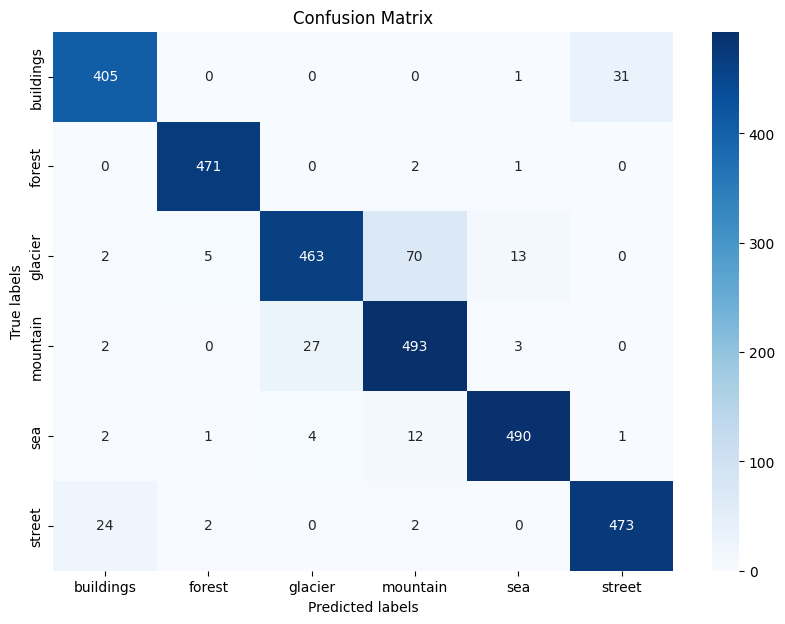

In [4]:
all_predictions, all_true_labels = evaluate_model(
    model=loaded_model, 
    test_dataloader = testloader, 
    device = 'cuda', 
    class_names = data_preparation.classes_name
)

f1 = f1_score(all_true_labels, all_predictions, average='weighted')

In [5]:
f1

0.9315054388419116